# Exploring Player Engagement: Can Play Time, and Player Age Predict Email Subscription for the PLAI Minecraft Server?


**1	Introduction**

1.1	Background Summary

>The Pacific Laboratory for Artificial Intelligence (PLAI) led by Frank Wood, is a research group collecting data about how people play Minecraft, to develop a new responsive AI. They need better recruitment tactics to bring in more players who will provide large amounts of data, by having ample play time. In this proposal, we will be exploring a broad question of what "kinds" of players are most likely to contribute a large amount of data. This way a predictive analysis would be able to identify exactly what “kinds” of people/players to whom the PLAI should advertise. This can be done by finding any implicit groupings and relationships in the data via visual analyses from which conclusions can be drawn. To make this analysis possible it may be required to wrangle the data such that any missing values are removed, it is grouped by certain criteria, and useless data columns are removed.

1.2	Research Question

>This proposal aims to explore if a player’s age group and their playtime can make a predictive analysis on email subscriptions, consequently relating to the amount of data generated. Previous research has shown that customers/clients who are subscribed to a company’s email list, are more loyal to that company (Holland & Baker, 2001). As such we hypothesized that if players are subscribed to the email list, then they are more invested and loyal in the research of PLAI. As a result, they would have a proportionally higher play time than those who are not subscribed, resulting in more data for PLAI. We studied this by creating in-depth visualizations of a player’s age versus their play time coloured according to their subscription status. With this information we made a knn classification with playtime and player age as the predictor variables, to predict whether or not a player will be subscribed to the email list.

1.3	Data Summary

>The PLAI has provided two data sets, containing information on their current players: the Player dataset and the Sessions dataset. For this proposal, we will be focusing on the player data set since it provides the most relevant information to the research question. The player dataset is a multivariable dataset which describes the different types of players and their data. It is a data table with 7 columns and 196 rows (observations), which are a mix of character, logical, and double variable types. The 7 columns are defined as:

- `experience`: A factor variable which is a self-declared level of familiarity by the player with Minecraft, where: 

    -    Veteran = Very Familiar 

    - Pro = Fairly Familiar 

    - Regular = Familiar 

    - Amateur = Slightly Familiar

    - Beginner = Not Familiar  

- `subscribe`: A logical variable (True or False), that denotes if a player is signed up for the server email list.  

- `hashedEmail`: A character variable which is an encrypted version of a player’s email.

- `hours_played`: A double variable which denotes the total amount of hours played on the server by a player.  
- `name`: A character variable that is the actual name of the player participating in this study.  
- `gender`: A character variable which is the self-identified gender of a player participating in this study.
    - Male
    - Female
    - Non-binary
    - Agender
    - Two-Spirited
    - Other
    - Prefer not to say
<br> <br>
- `Age`: A double variable which is the self-declared age of a player participating in this study.


**2 Methods & Results**

Describe Methods why.

In [2]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
# Loading in the data set
players_url <- "https://raw.githubusercontent.com/rachelbmgr/toy_ds_project/refs/heads/main/players.csv"
players <- read_csv(players_url)
head(players)
tail(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [23]:
# Cleaning the data
players_tidy <- players |>
                filter(Age != 'NA') |>
                select(Age, subscribe, played_hours, experience, subscribe)
players_scale_time <- players_tidy |>
                mutate(played_mins = played_hours * 60) |>
                mutate(subscribe = as_factor(subscribe))  |>
                select(-played_hours)
                
head(players_scale_time)

Age,subscribe,experience,played_mins
<dbl>,<fct>,<chr>,<dbl>
9,TRUE,Pro,1818
17,TRUE,Veteran,228
17,FALSE,Veteran,0
21,TRUE,Amateur,42
21,TRUE,Regular,6
17,TRUE,Amateur,0


In [24]:
# Data summary

players_summary <- players_scale_time |>
                   group_by(subscribe) |>
                    summarize(mean_age = mean(Age),
                              mean_mins = mean(played_mins))
players_summary

subscribe,mean_age,mean_mins
<fct>,<dbl>,<dbl>
FALSE,22.98077,30.11538
TRUE,19.61972,472.98592


Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


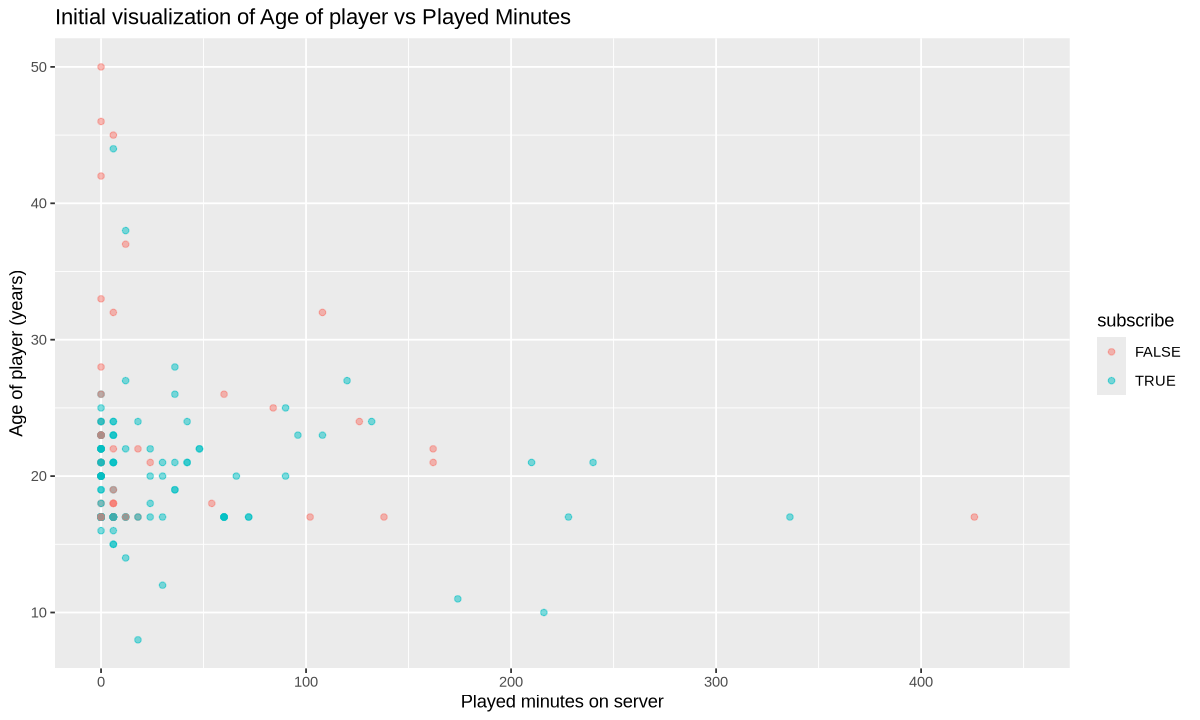

In [25]:
# Visulization of data set pre-knn
options(repr.plot.width = 10, repr.plot.height = 6)
players_graph_1 <- players_scale_time |>
                   ggplot(aes(x = played_mins, y = Age, color = subscribe)) +
                   geom_point(alpha = 0.5) + 
                   xlab("Played minutes on server") + 
                   ylab("Age of player (years)") + 
                   xlim(c(0, 450)) +
                   ggtitle("Initial visualization of Age of player vs Played Minutes")
players_graph_1


In [71]:
# Splitting Dataset
players_split <- initial_split(players_scale_time, prop = 0.75, strata = subscribe) 
players_train <- training(players_split)
players_test <- testing(players_split)

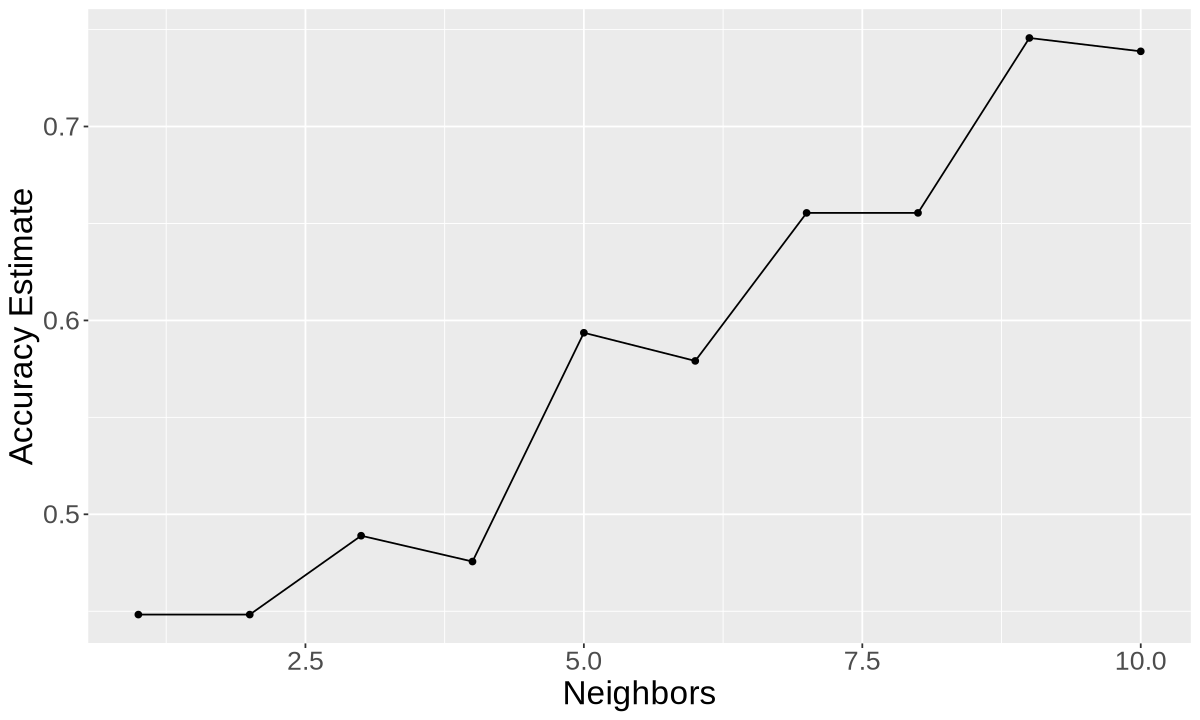

In [70]:
# Determining best KNN value 
set.seed(1)
# Create tune model (k = 1-10)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_recipe <- recipe(subscribe ~ Age + played_mins, data = players_train) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())


# Perform 5 fold cross validation
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = players_vfold, grid = tibble(neighbors = seq(from = 1, to = 10, by = 1))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20))
cross_val_plot

# knn_fit <- workflow() |>
#   add_recipe(players_recipe) |>
#   add_model(knn_spec) |>
#   fit(data = players_train)


# Collect metrics

# knn_results 

**Discussion**